# Decision Tree/Random Forest
Decision tree classification

# Contents
- [Decision Tree](#dt)
- [Random Forest](#rf)  
    - [Modeling](#model)
    - [Tuning](#tune)
    - [Feature Importances](#feat_imp)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Decision Tree <a name="dt"></a>
## Data
### Initial Parameters

In [2]:
# number of groups
num_grps = 3
# minimum number of points per group
min_pts = 15
# maximum number of points per group
max_pts = 50

### Generate Data

In [3]:
import random

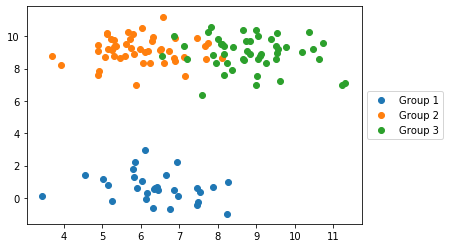

In [4]:
data = []
fig, ax = plt.subplots()
# generate randomized data set for each group
for i in range(num_grps):
    # random size of group based on limits
    size = np.random.randint(min_pts, max_pts+1)
    # centroid of group
    np.random.seed(i)
    cntr = np.random.randint(1, 11, size=2)
    # assign x values (random centroid with noise)
    x = cntr[0] + np.random.normal(0, 1, size=size)
    # assign y values (random centroid with noise)
    y = cntr[1] + np.random.normal(0, 1, size=size)
    # assign group to points
    grp = ['Group ' + str(i+1)] * size
    # combine x, y coords and group and add to data list
    data += [i for i in zip(x, y, grp)]
    # plot data
    ax.scatter(x, y, label=grp[0])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [5]:
len(data)

127

In [6]:
# feature labels
feature_names = ['x_coord', 'y_coord']

In [7]:
# class labels
classes = np.unique([pt[2] for pt in data])

### Test Data

In [8]:
# select test set from data (20%)
test_set = random.sample(data, int(len(data) * 0.2))
# define variable with only test coordinates
X_test = [(pt[0], pt[1]) for pt in test_set]
# define variable with test groups
y_test = [pt[2] for pt in test_set]

### Train Data

In [9]:
# designate training data
train_set = [i for i in data if i not in test_set]
# define variable with only train coordinates
X_train = [(pt[0], pt[1]) for pt in train_set]
# define variable containing train groups
y_train = [pt[2] for pt in train_set]

## Decision Tree Modeling

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

### Initial Model

In [11]:
# create instance of decision tree model
clf = DecisionTreeClassifier()

In [12]:
# fit model to training set
clf = clf.fit(X_train, y_train)

In [13]:
# create class predictions
y_pred = clf.predict(X_test)

In [14]:
# model performance (accuracy)
clf.score(X_test, y_test)

0.88

### Plot Decision Tree

In [15]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

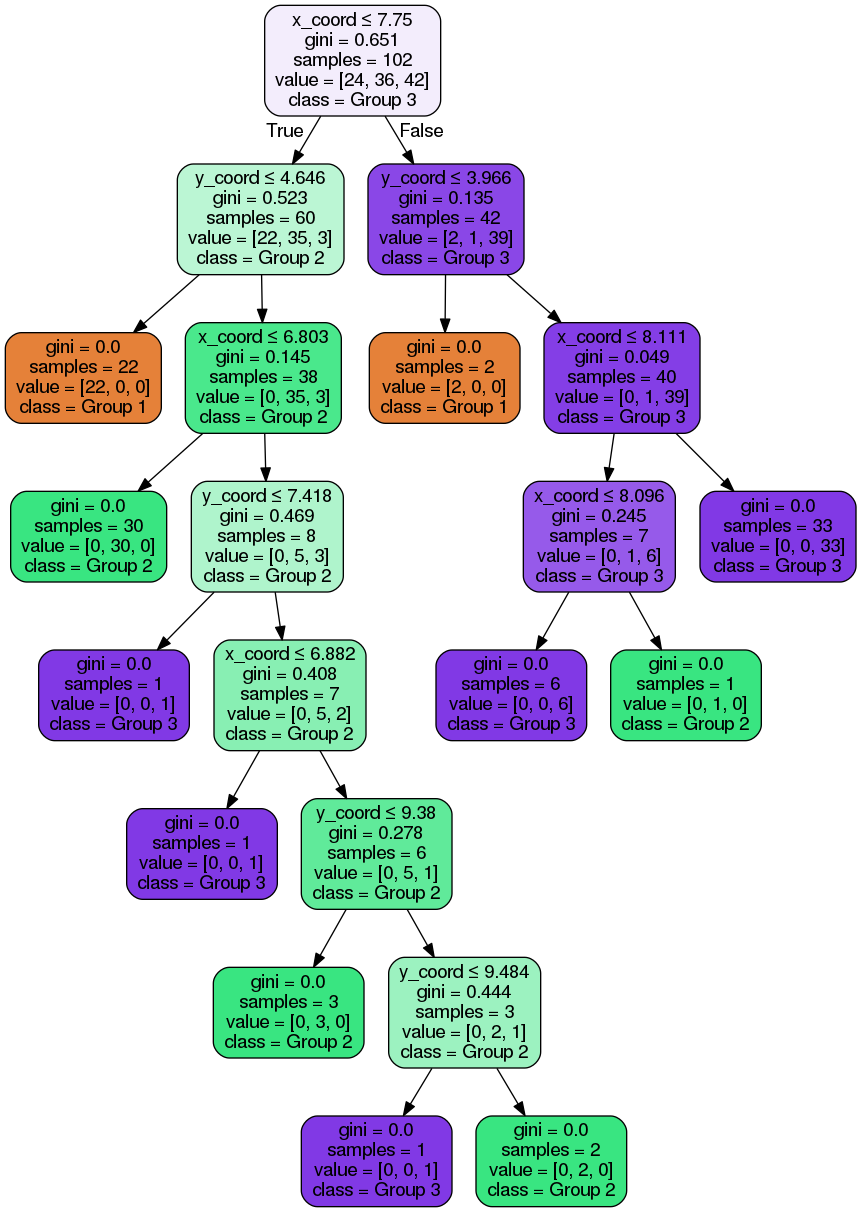

In [16]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names = feature_names, 
                class_names=classes)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Hyperparameters

In [17]:
# include tuning parameters
clf = DecisionTreeClassifier(
    criterion='entropy', # splitting method
    max_depth=3) # maximum depth of tree, used to prevent overfitting
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.92

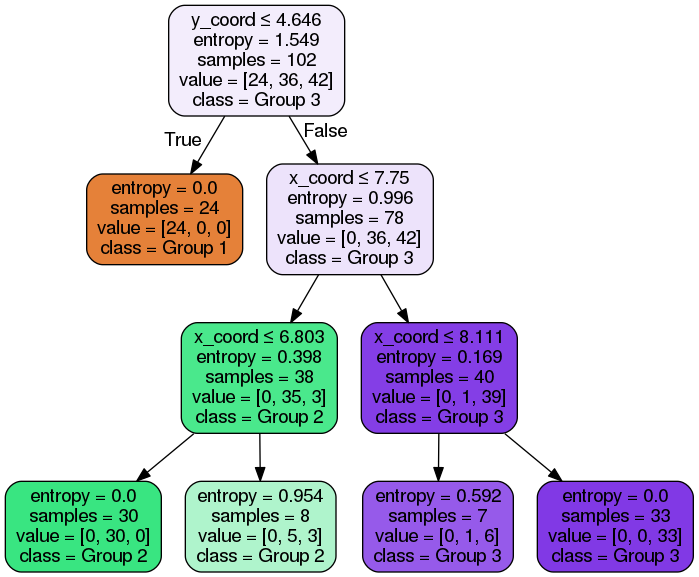

In [18]:
# plot decision tree
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names = feature_names, 
                class_names=np.unique(y_test))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forest <a name="rf"></a>

## Data

In [19]:
from sklearn.datasets import load_breast_cancer

In [20]:
data = load_breast_cancer()

In [21]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['cancer'] = data['target']

In [22]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Define Variables

In [23]:
# define predictor variables (features)
X = df.iloc[:, :-1]
# define dependent variable (target)
y = df.iloc[:, -1]

## Modeling <a name="model"></a>

### Train/Test Split
Split data into feature training, feature test, target training and target test variables

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# specify test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Initial Model

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [27]:
# create instance of model
rf = RandomForestClassifier(random_state=0)

In [28]:
# fit model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
# overall model accuracy
rf.score(X_test, y_test)

0.951048951048951

In [30]:
# model predictions
rf_pred = rf.predict(X_test)

In [31]:
# confusion matrix
metrics.confusion_matrix(y_test, rf_pred)

array([[52,  1],
       [ 6, 84]])

In [32]:
# classification report
print(metrics.classification_report(y_test, rf_pred))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94        53
          1       0.99      0.93      0.96        90

avg / total       0.95      0.95      0.95       143



In [33]:
# assign report output values
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, rf_pred)

In [34]:
precision

array([0.89655172, 0.98823529])

In [35]:
recall

array([0.98113208, 0.93333333])

In [36]:
fscore

array([0.93693694, 0.96      ])

In [37]:
support

array([53, 90])

## Tuning <a name="tune"></a>

### RandomizedSearch

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
# try range of values for hyperparameters

# number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [10, 50, 100]
# number of features to consider at every split
#max_features = np.arange(1, X.shape[1]+1)
max_features = [3, 5]
# maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = [3, 10]
# minimum number of samples required to split a node
min_samples_split = [2, 10]
# minimum number of samples required at each leaf node
min_samples_leaf = [1, 5]
# method of selecting samples for training each tree
bootstrap = [True, False]

In [40]:
# define hyperparameter dictionary
hyperparams = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [41]:
# create instance of model
rf = RandomForestClassifier(random_state=0)

In [42]:
# create instance of tuner
rand = RandomizedSearchCV(rf, hyperparams, scoring='accuracy', cv=5, random_state=0)

In [43]:
# fit tuner to data
rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [10, 50, 100], 'max_features': [3, 5], 'max_depth': [3, 10], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 5], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [44]:
# output parameters for optimal model
rand.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': 10,
 'bootstrap': True}

In [45]:
# output optimal overall accuracy
rand.best_score_

0.9553990610328639

In [46]:
# create model with optimal hyperparameters
rf_tune = RandomForestClassifier(
    n_estimators = rand.best_params_['n_estimators'],
    max_features = rand.best_params_['max_features'],
    max_depth = rand.best_params_['max_depth'],
    min_samples_split = rand.best_params_['min_samples_split'],
    min_samples_leaf = rand.best_params_['min_samples_leaf'],
    bootstrap = rand.best_params_['bootstrap'],
    random_state=0
)

In [47]:
# fit and score
rf_tune.fit(X_train, y_train)
rf_tune.score(X_test, y_test)

0.965034965034965

In [48]:
# model predictions
rf_pred = rf_tune.predict(X_test)

In [49]:
# confusion matrix
metrics.confusion_matrix(y_test, rf_pred)

array([[51,  2],
       [ 3, 87]])

In [50]:
# classification report
print(metrics.classification_report(y_test, rf_pred))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95        53
          1       0.98      0.97      0.97        90

avg / total       0.97      0.97      0.97       143



### Model Within Pipeline

In [51]:
from sklearn.pipeline import Pipeline

In [52]:
# set pipeline parameters
rf_pipe = Pipeline([
    ('model', RandomForestClassifier(random_state=0))
])

In [53]:
# fit model using pipeline parameters
rf_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False))])

In [54]:
# pipeline score
rf_pipe.score(X_test, y_test)

0.951048951048951

In [55]:
# model predictions
rf_pred = rf_pipe.predict(X_test)

In [56]:
# classification report
print(metrics.classification_report(y_test, rf_pred))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94        53
          1       0.99      0.93      0.96        90

avg / total       0.95      0.95      0.95       143



In [57]:
# define hyperparameter dictionary for pipeline input
hyperparams = {
    'model__n_estimators': n_estimators,
    'model__max_features': max_features,
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'model__bootstrap': bootstrap
}

In [58]:
# tune model pipeline for recall
rf_tune = RandomizedSearchCV(rf_pipe, hyperparams, scoring='accuracy', cv=5, random_state=0)

In [59]:
rf_tune.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'model__n_estimators': [10, 50, 100], 'model__max_features': [3, 5], 'model__max_depth': [3, 10], 'model__min_samples_split': [2, 10], 'model__min_samples_leaf': [1, 5], 'model__bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [60]:
rf_tune.score(X_test, y_test)

0.965034965034965

In [61]:
# optimal parameters
rf_tune.best_params_

{'model__n_estimators': 100,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 1,
 'model__max_features': 3,
 'model__max_depth': 10,
 'model__bootstrap': True}

In [62]:
# assign best hyperparameter values within pipeline
rf_pipe.set_params(
    model__n_estimators = rand.best_params_['n_estimators'],
    model__max_features = rand.best_params_['max_features'],
    model__max_depth = rand.best_params_['max_depth'],
    model__min_samples_split = rand.best_params_['min_samples_split'],
    model__min_samples_leaf = rand.best_params_['min_samples_leaf'],
    model__bootstrap = rand.best_params_['bootstrap']
)

Pipeline(memory=None,
     steps=[('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False))])

In [63]:
# fit model and return predictions
rf_pipe.fit(X_train, y_train)
rf_pred = rf_pipe.predict(X_test)
rf_pipe.score(X_test, y_test)

0.965034965034965

In [64]:
print(metrics.classification_report(y_test, rf_pred))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95        53
          1       0.98      0.97      0.97        90

avg / total       0.97      0.97      0.97       143



## Feature Importances <a name="feat_imp"></a>

In [65]:
# feature coefficients
rf_pipe.named_steps['model'].feature_importances_

array([0.03931083, 0.01697197, 0.06354432, 0.03685922, 0.00699014,
       0.02428657, 0.09523383, 0.09202855, 0.00497511, 0.00553186,
       0.03110764, 0.00744533, 0.02692482, 0.04218905, 0.00508149,
       0.00579528, 0.02089885, 0.01782569, 0.00338598, 0.00743192,
       0.06179664, 0.01598395, 0.1269189 , 0.06254112, 0.01407961,
       0.01689521, 0.0517505 , 0.07548788, 0.01402571, 0.00670203])

In [66]:
# feature names
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [67]:
# combine feature labels and coefficients
ftr_coefs = [(item[0], item[1]) for item in zip(X.columns, rf_pipe.named_steps['model'].feature_importances_)]

In [68]:
# sort features by importance
sorted(ftr_coefs, key=lambda x: x[1])[::-1]

[('worst perimeter', 0.12691890253269777),
 ('mean concavity', 0.09523382820591779),
 ('mean concave points', 0.09202855298651799),
 ('worst concave points', 0.07548787712745432),
 ('mean perimeter', 0.06354432259521552),
 ('worst area', 0.06254111734986999),
 ('worst radius', 0.0617966361445582),
 ('worst concavity', 0.05175050386628441),
 ('area error', 0.04218904796537644),
 ('mean radius', 0.0393108345009848),
 ('mean area', 0.036859219985060074),
 ('radius error', 0.031107636003750577),
 ('perimeter error', 0.026924816401275985),
 ('mean compactness', 0.024286572678318352),
 ('concavity error', 0.020898851898944974),
 ('concave points error', 0.017825688565816317),
 ('mean texture', 0.01697197337720371),
 ('worst compactness', 0.016895205858349728),
 ('worst texture', 0.01598394633508538),
 ('worst smoothness', 0.014079605438928701),
 ('worst symmetry', 0.014025705148639274),
 ('texture error', 0.007445331568320537),
 ('fractal dimension error', 0.007431924653071291),
 ('mean smoo